In [1]:
import sys
print(sys.executable) 

C:\ProgramData\Anaconda3\python.exe


In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load data
df=pd.read_csv("HR-data.csv.txt")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Rename necessary columns
df=df.rename(columns={'left':'turnover','sales':'department'})

### Data Quality Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   turnover               14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
turnover                 False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [8]:
df.duplicated().sum()

3008

In [9]:
df.shape

(14999, 10)

In [10]:
#Find turnover rate
turnover_rate=df.turnover.value_counts()/len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

## Exploratory Data Analysis

In [11]:
df.describe(include=np.number)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
df.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [13]:
#Print a summary of turnover
turn_summ=df.groupby(['turnover']).mean()
turn_summ

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


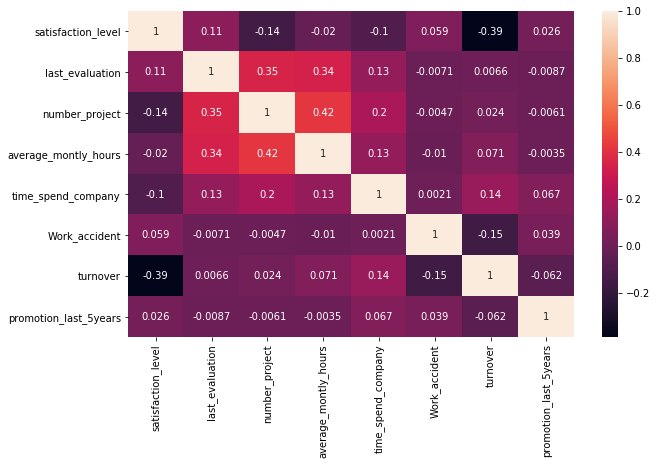

In [14]:
#Correlation matrix
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
corr

In [15]:
#Define functions to plot features against target
def countplot(col):
    plt.figure(figsize=(8,5))
    sns.countplot(col,data=df,hue='turnover')
    
def kdeplot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(df.loc[(df['turnover']==0),col],shade=True,label="no turnover")
    sns.kdeplot(df.loc[(df['turnover']==1),col],shade=True,label="turnover")
    
    

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

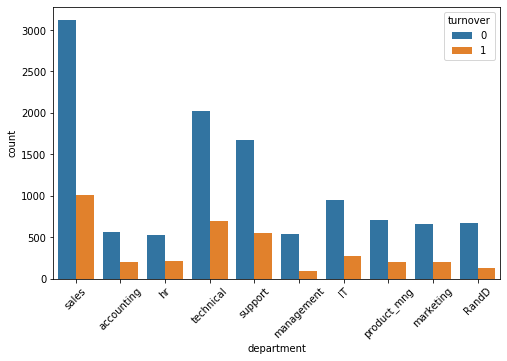

In [16]:
countplot('department')
plt.xticks(rotation=45)

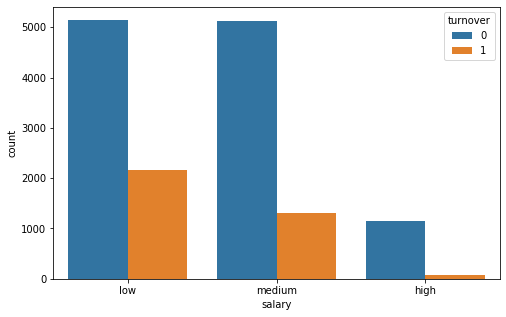

In [17]:
countplot('salary')

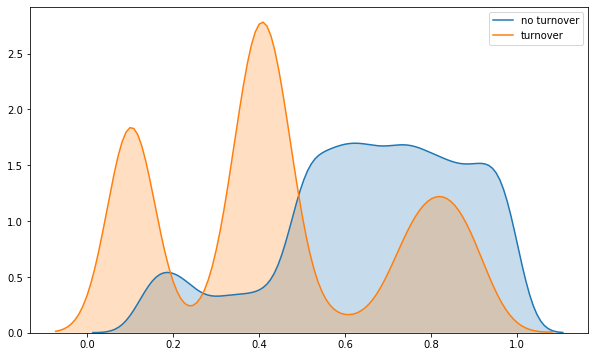

In [18]:
kdeplot('satisfaction_level')

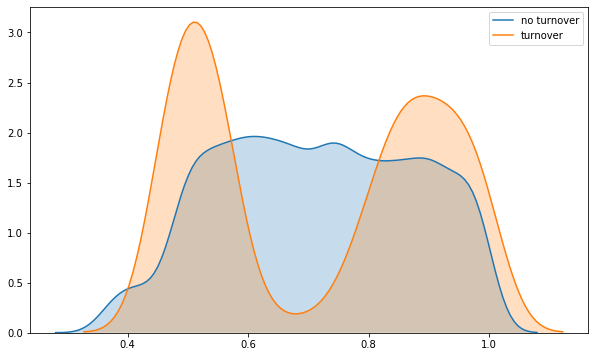

In [19]:
kdeplot('last_evaluation')

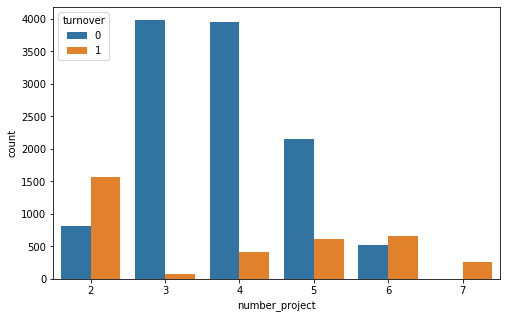

In [20]:
countplot('number_project')

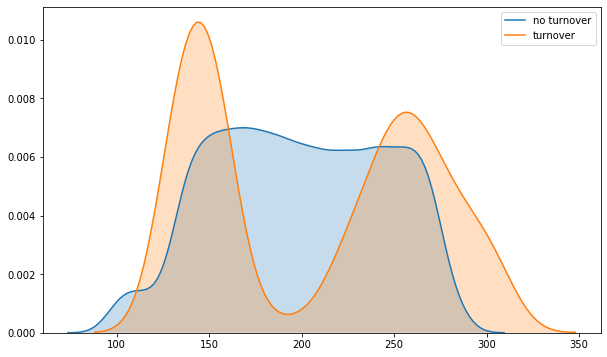

In [21]:
kdeplot('average_montly_hours')

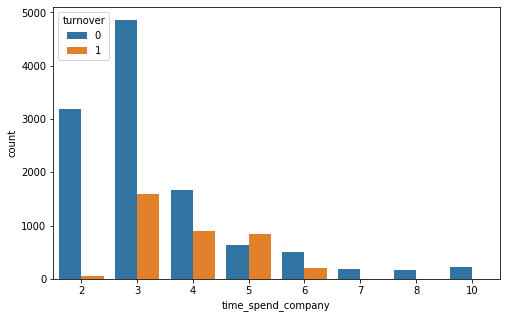

In [22]:
countplot("time_spend_company")

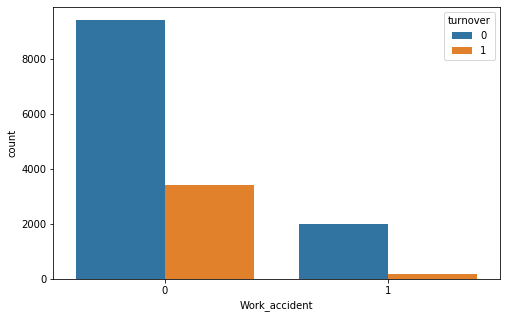

In [23]:
countplot('Work_accident')

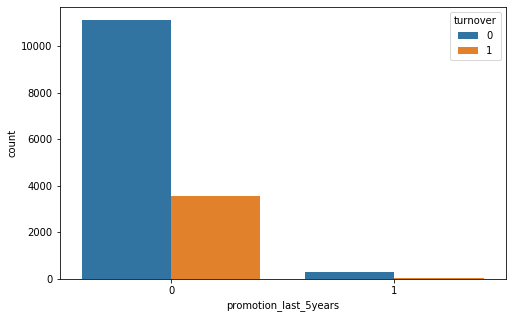

In [24]:
countplot('promotion_last_5years')

## PreProcessing

In [25]:
# Seperate features into categorical and numerical
cat_var=['department','salary']
num_var=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
         'Work_accident','promotion_last_5years']
catvar_df=pd.get_dummies(df[cat_var],drop_first=True)
numvar_df=df[num_var]
new_df=pd.concat([catvar_df,numvar_df],axis=1)
new_df.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0,0
3,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0,0


## Class Imbalance

Text(0, 0.5, 'Turnover Count')

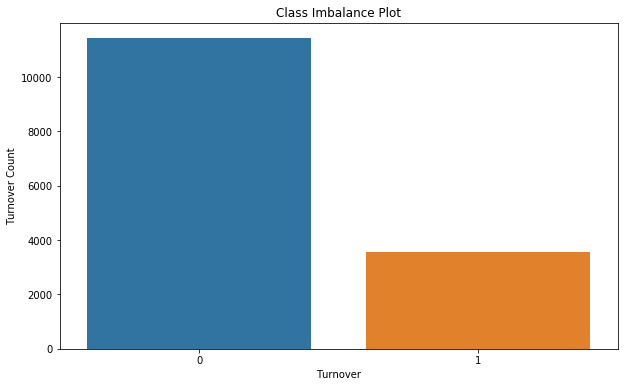

In [26]:
plt.figure(figsize=(10,6))
turnover_count=df.turnover.value_counts()
sns.barplot(x=turnover_count.index,y=turnover_count.values,data=df)
plt.title("Class Imbalance Plot")
plt.xlabel('Turnover')
plt.ylabel('Turnover Count')

The above plot shows the class imbalance. So we need to apply resampling method to resamble the unbalanced class

## Split the data to Train and Test sets

In [27]:
from sklearn.model_selection import train_test_split
X=new_df.iloc[:,1:]
y=new_df.iloc[:,0]
X_train,y_train,X_test,y_test=train_test_split(X,y,train_size=0.75)

## Resampling using SMOTE method

In [32]:
from imblearn.over_sampling import SMOTE
method = SMOTE()
X_resampled,y_resampled=method.fit_sample(X,y)

In [33]:
X_resampled.shape

(28424, 17)

In [34]:
y_resampled.shape

(28424,)

# Train Models

<!-- Train the data using three models,Logistic Regression,Random Forest and Support Vector Machine -->

Train the data using three models
1.Logistic Regression
2.Random Forest
3.Support Vector Machine

### Logistic regression